In [1]:
import os
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('data_time.csv')
data

,Unnamed: 0,Video_number,Density_burst,Density_throttling,Quality
0,0,1,2.575873e+07,7.670063e+05,2160
1,1,2,2.093498e+07,8.187726e+05,2160
2,2,3,2.473638e+07,1.220762e+06,2160
3,3,4,1.771628e+07,1.517696e+06,2160
4,4,5,9.715531e+06,7.052399e+05,2160
...,...,...,...,...,...
145,145,21,2.209689e+06,3.304367e+04,360
146,146,22,2.285067e+06,3.488049e+04,360
147,147,23,1.595180e+06,2.678645e+04,360
148,148,24,2.364400e+06,3.232247e+04,360


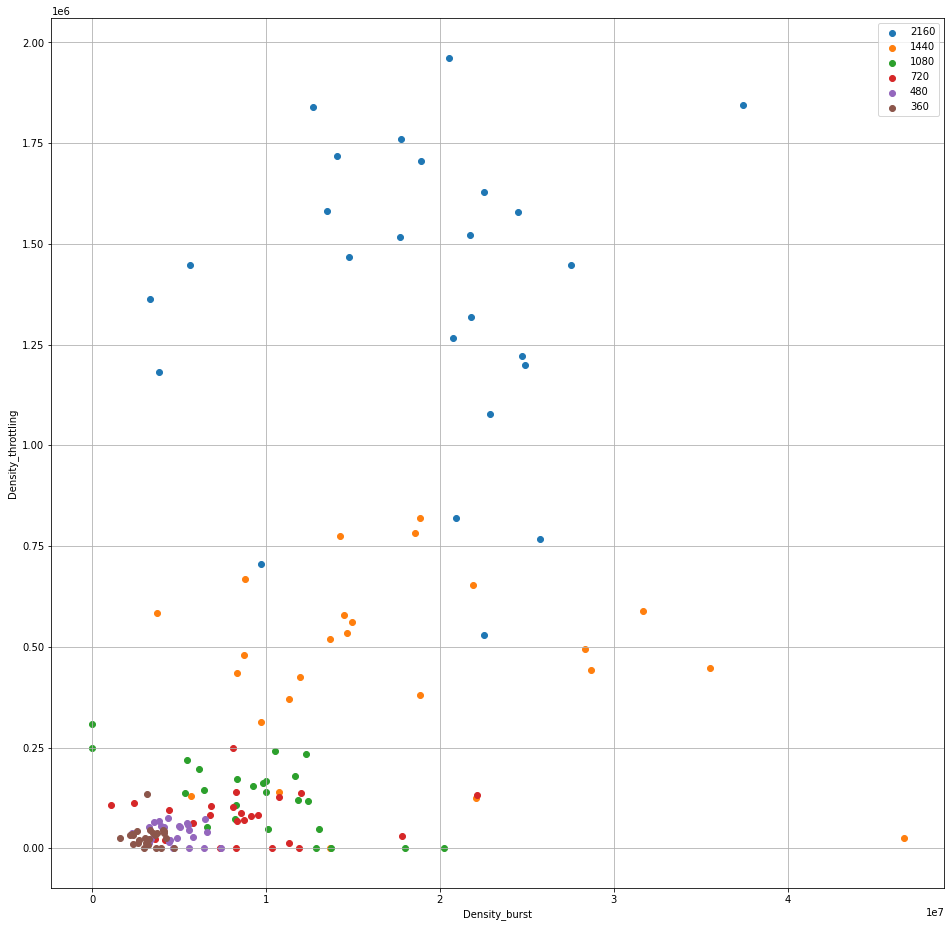

In [3]:
# Посмотрим на данные

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(16)

for quality in [2160, 1440, 1080, 720, 480, 360]:
    x = []
    y = []
    for i in range(len(data)):
        if data['Quality'][i] == quality:
            x.append(data['Density_burst'][i])
            y.append(data['Density_throttling'][i])
    plt.scatter(x, y, label=quality)
    
plt.xlabel("Density_burst")
plt.ylabel("Density_throttling")
plt.legend()
plt.grid(True)

plt.show()

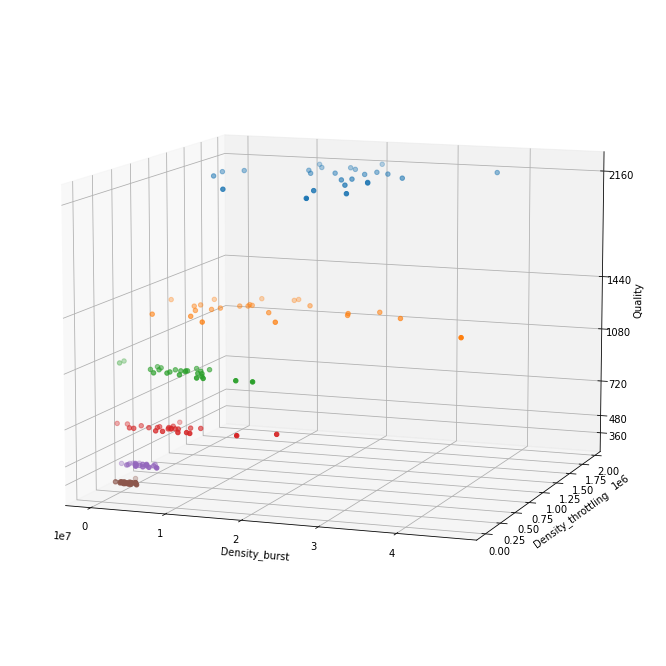

In [4]:
fig_3d = plt.figure(figsize=(12, 12))
ax = fig_3d.add_subplot(projection='3d')

for quality in [2160, 1440, 1080, 720, 480, 360]:
    x = []
    y = []
    z = []
    for i in range(len(data)):
        if data['Quality'][i] == quality:
            x.append(data['Density_burst'][i])
            y.append(data['Density_throttling'][i])
            z.append(quality)
    ax.scatter(x, y, z)
    
ax.set_xlabel('Density_burst')
ax.set_ylabel('Density_throttling')
ax.set_zlabel('Quality')

ax.view_init(10,-70)

ax.set_zticks([360, 480, 720, 1080, 1440, 2160])

plt.grid(True)

plt.show()

In [5]:
data_shuffled = shuffle(data)
data_shuffled

,Unnamed: 0,Video_number,Density_burst,Density_throttling,Quality
104,104,5,3.275626e+06,1.251754e+04,480
93,93,19,8.294630e+06,1.410807e+05,720
37,37,13,1.447759e+07,5.784087e+05,1440
31,31,7,2.189573e+07,6.527543e+05,1440
51,51,2,1.802498e+07,1.783784e+00,1080
...,...,...,...,...,...
19,19,20,3.741663e+07,1.844300e+06,2160
10,10,11,5.626413e+06,1.448097e+06,2160
133,133,9,3.281340e+06,2.346384e+04,360
60,60,11,1.184839e+07,1.204103e+05,1080


In [6]:
# Пробуем обычный KNN

X = data_shuffled[['Density_burst', 'Density_throttling']]
y = data_shuffled['Quality']
for i in range(1, 30):
    model = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(model, X, y, cv=10, scoring = 'accuracy')
    n_spaces = 1 - i // 10
    print(i, ' ' * n_spaces, scores.mean())

1   0.5266666666666666
2   0.4666666666666667
3   0.5200000000000001
4   0.49333333333333335
5   0.4866666666666667
6   0.5133333333333334
7   0.48666666666666664
8   0.47333333333333333
9   0.5133333333333333
10  0.48666666666666664
11  0.4933333333333333
12  0.48666666666666664
13  0.48
14  0.44000000000000006
15  0.4933333333333333
16  0.48666666666666664
17  0.4666666666666667
18  0.45999999999999996
19  0.4533333333333333
20  0.4533333333333333
21  0.44666666666666666
22  0.44666666666666666
23  0.45999999999999996
24  0.5066666666666666
25  0.48
26  0.48
27  0.49333333333333335
28  0.48666666666666664
29  0.5066666666666666


In [7]:
# Лучшее значение -- 0.527 для n = 1

In [8]:
# Нужно нормализовать данные

data_norm = data_shuffled.copy()

for column in ['Density_burst', 'Density_throttling']:
    data_norm[column] = ((data_norm[column] - data_norm[column].min()) /
                            (data_norm[column].max() - data_norm[column].min()))
    
data_norm

,Unnamed: 0,Video_number,Density_burst,Density_throttling,Quality
104,104,5,0.070165,0.006378,480
93,93,19,0.177679,0.071897,720
37,37,13,0.310126,0.294768,1440
31,31,7,0.469033,0.332656,1440
51,51,2,0.386116,0.000000,1080
...,...,...,...,...,...
19,19,20,0.801511,0.939893,2160
10,10,11,0.120522,0.737979,2160
133,133,9,0.070288,0.011957,360
60,60,11,0.253806,0.061363,1080


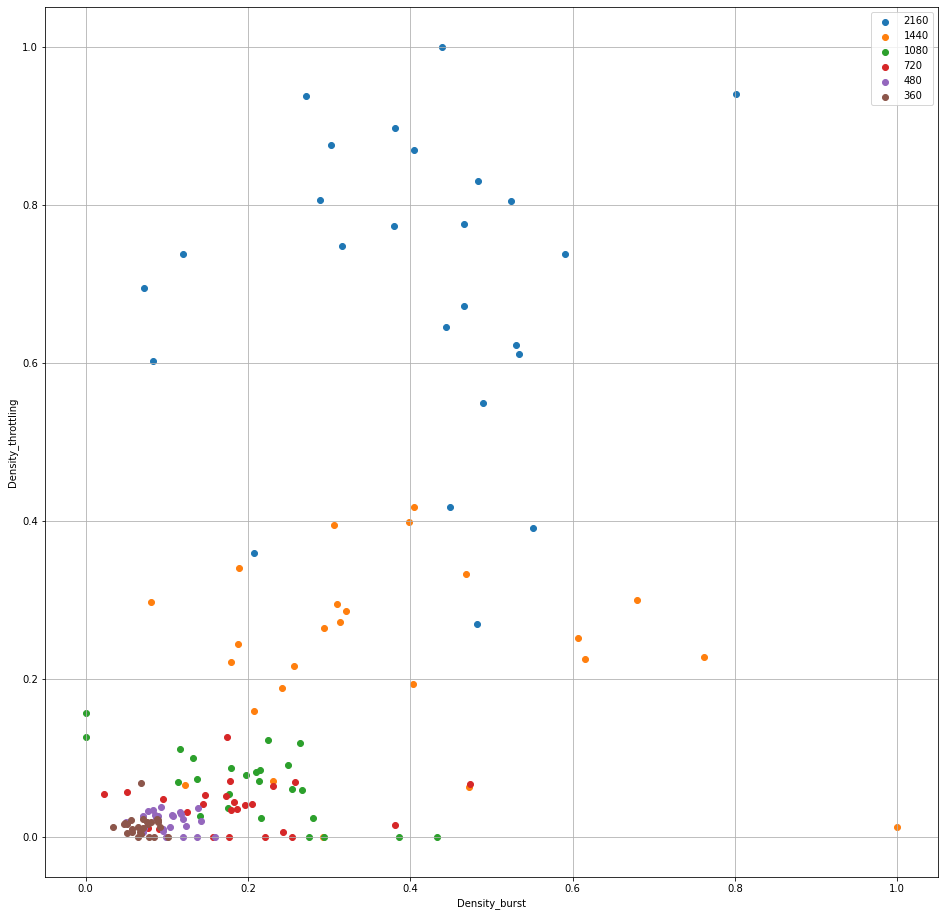

In [9]:
# Строим график ещё раз, теперь с нормализованными данными

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(16)

for quality in [2160, 1440, 1080, 720, 480, 360]:
    x = []
    y = []
    for i in range(len(data_norm)):
        if data['Quality'][i] == quality:
            x.append(data_norm['Density_burst'][i])
            y.append(data_norm['Density_throttling'][i])
    plt.scatter(x, y, label=quality)
    
plt.xlabel("Density_burst")
plt.ylabel("Density_throttling")
plt.legend()
plt.grid(True)

plt.show()

In [10]:
# Не то чтобы много поменялось, но это поможет нам для дальнейшей работы с классификаторами

In [11]:
# Пробуем KNN, но теперь с нормализованными данными

X = data_norm[['Density_burst', 'Density_throttling']]
y = data_norm['Quality']
for i in range(1, 30):
    model = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(model, X, y, cv=10, scoring = 'accuracy')
    n_spaces = 1 - i // 10
    print(i, ' ' * n_spaces, scores.mean())

1   0.6333333333333334
2   0.6466666666666667
3   0.6533333333333333
4   0.6933333333333334
5   0.7000000000000001
6   0.7133333333333334
7   0.6866666666666666
8   0.6799999999999999
9   0.6799999999999999
10  0.6799999999999999
11  0.6799999999999999
12  0.6866666666666666
13  0.7
14  0.6799999999999999
15  0.6799999999999999
16  0.6599999999999999
17  0.6599999999999999
18  0.6399999999999999
19  0.6466666666666667
20  0.6533333333333333
21  0.6466666666666666
22  0.6666666666666667
23  0.6799999999999999
24  0.6666666666666667
25  0.6666666666666667
26  0.6599999999999999
27  0.6466666666666667
28  0.6333333333333332
29  0.6466666666666667


In [12]:
# Точность улучшилась -- теперь это 0.713 для n = 6

In [25]:
# Пробуем CatBoost
for iter_param in ([100, 200, 500, 1000, 2000]):
    for cv_param in ([5, 10, 20]):
        model = CatBoostClassifier(iterations=iter_param, silent=True)
        scores = cross_val_score(model, X, y, cv=cv_param, scoring = 'accuracy')
        n_spaces_i = 1 - iter_param // 1000
        n_spaces_j = 1 - cv_param // 10
        print('iterations:', iter_param,' ' * n_spaces_i, 'cv:', cv_param, 
              ' ' * n_spaces_j, 'scores_mean:', scores.mean())
        
        n_spaces = 1 - i // 10

iterations: 100   cv: 5   scores_mean: 0.6799999999999999
iterations: 100   cv: 10  scores_mean: 0.7133333333333333
iterations: 100   cv: 20  scores_mean: 0.71875
iterations: 200   cv: 5   scores_mean: 0.6933333333333332
iterations: 200   cv: 10  scores_mean: 0.72
iterations: 200   cv: 20  scores_mean: 0.7330357142857142
iterations: 500   cv: 5   scores_mean: 0.7066666666666666
iterations: 500   cv: 10  scores_mean: 0.7066666666666668
iterations: 500   cv: 20  scores_mean: 0.7330357142857142
iterations: 1000  cv: 5   scores_mean: 0.7066666666666666
iterations: 1000  cv: 10  scores_mean: 0.7133333333333334
iterations: 1000  cv: 20  scores_mean: 0.7392857142857142
iterations: 2000  cv: 5   scores_mean: 0.7066666666666666
iterations: 2000  cv: 10  scores_mean: 0.7133333333333334
iterations: 2000  cv: 20  scores_mean: 0.7196428571428571


In [15]:
# 0.733 -- наилучшее значение в данном эксперименте, 200 итераций, cv=10

In [16]:
# Пробуем Support Vector Classification

X_norm = data_norm[['Density_burst', 'Density_throttling']]
y_norm = data_norm['Quality']
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
scores = cross_val_score(clf, X_norm, y_norm, cv=10, scoring = 'accuracy')
scores.mean()

0.6533333333333333